1.a.

    P(red 1st draw) = P(white 1st draw) = P(red 2nd draw) = P(white 2nd draw) = 1/2
    frr = (1/2)*(1/2) = 1/4
    fww = (1/2)*(1/2) = 1/4
    frw = 1 - frr - fww = 1/2
    
1.b.

    fr = (2*Nred + Norange) / (2*(Nred + Norange + Nwhite))
    fw = (2*Nwhite + Norange) / (2*(Nred + Norange + Nwhite))


[0, 1, 0, 110]

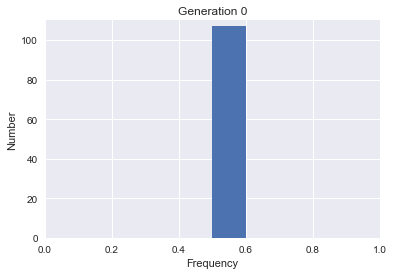

In [49]:
# 1.c.

# Imports
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Define starting probability, number of generations, number of alleles, and number of populations
freq = 0.5
num_gen = 20
num_allele = 32
num_pop = 107

# Initialize array to store frequencies
freq_array = numpy.zeros((num_gen, num_pop))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[0][i] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[j-1][i])
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[j][i] = new_freq

plt.hist(freq_array[0])
plt.title('Generation 0')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 110])

[0, 1, 0, 110]

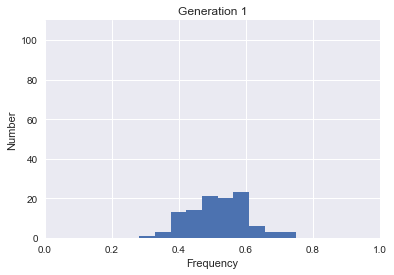

In [50]:
plt.hist(freq_array[1])
plt.title('Generation 1')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 110])

[0, 1, 0, 110]

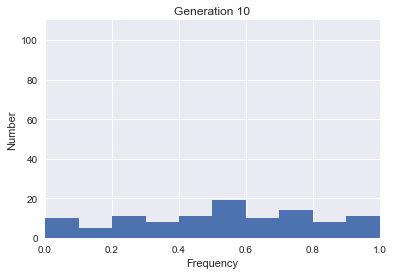

In [51]:
plt.hist(freq_array[10])
plt.title('Generation 10')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 110])

[0, 1, 0, 110]

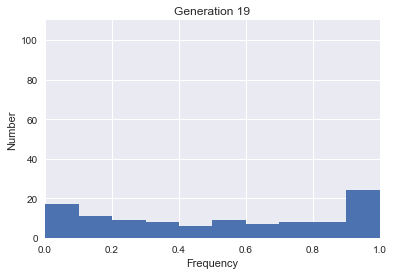

In [52]:
plt.hist(freq_array[19])
plt.title('Generation 19')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 110])

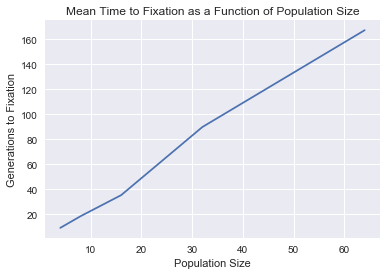

In [53]:
# 1.d.

# Define starting probability, number of generations, number of alleles, and number of populations
freq = 0.5
num_gen = 1001
num_allele = 4
num_pop = 107

# Initialize array to store frequencies
freq_array = numpy.zeros((num_gen, num_pop))

# Initialize array to store fixing points
fix_array = numpy.zeros((5, num_pop))

# Run the simulation for varying population size (N = 4, 8, 16, 32, and 64)
for k in range(5):
    
    # Update num_allele
    num_allele = 2 * num_allele
    
    # Loop through each generation for each population calculating the frequency of the allele
    for i in range(num_pop):
        freq_array[0][i] = freq
        first = True
    
        # Update freq at each generation
        for j in range(1, num_gen):
            choices = numpy.random.rand(num_allele)
            num_r = numpy.sum(choices < freq_array[j-1][i])
            new_freq = num_r / num_allele
    
            # Determine when freq becomes fixed
            if (new_freq == 0 or new_freq == 1) and (first == True):
                first = False
                fix_array[k][i] = j
        
            #Store new_freq
            freq_array[j][i] = new_freq

# Find mean time for population size of 4
mean_time_4 = 0
for a in range(len(fix_array[0])):
    mean_time_4 = mean_time_4 + fix_array[0][a]
mean_time_4 = mean_time_4 / len(fix_array[0])

# Find mean time for population size of 8
mean_time_8 = 0
for b in range(len(fix_array[1])):
    mean_time_8 = mean_time_8 + fix_array[1][b]
mean_time_8 = mean_time_8 / len(fix_array[1])

# Find mean time for population size of 16
mean_time_16 = 0
for c in range(len(fix_array[2])):
    mean_time_16 = mean_time_16 + fix_array[2][c]
mean_time_16 = mean_time_16 / len(fix_array[2])

# Find mean time for population size of 32
mean_time_32 = 0
for d in range(len(fix_array[3])):
    mean_time_32 = mean_time_32 + fix_array[3][d]
mean_time_32 = mean_time_32 / len(fix_array[3])

# Find mean time for population size of 64
mean_time_64 = 0
for e in range(len(fix_array[4])):
    mean_time_64 = mean_time_64 + fix_array[4][e]
mean_time_64 = mean_time_64 / len(fix_array[0])

# Plot mean time to fixation as a function of population size
plt.plot([4,8,16,32,64], [mean_time_4, mean_time_8, mean_time_16, mean_time_32, mean_time_64])
plt.title('Mean Time to Fixation as a Function of Population Size')
plt.xlabel('Population Size')
plt.ylabel('Generations to Fixation')

1.d.

    These results show that as population size increases, the role that genetic drift plays decreases. 

[0, 100, 0, 1]

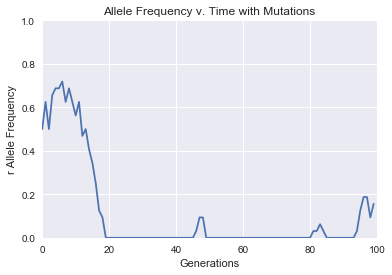

In [81]:
# 1.e.

# Define starting probability, number of generations, number of alleles, number of populations, and mu frequency
freq = 0.5
num_gen = 100
num_allele = 32
num_pop = 1
mu_freq = 0.001

# Initialize array to store frequencies
freq_array = numpy.zeros((num_pop, num_gen))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[i][0] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[i][j-1])

        choices_mu_r = numpy.random.rand(num_r)
        choices_mu_w = numpy.random.rand(num_allele - num_r)
        
        num_r = num_r - numpy.sum(choices_mu_r < 0.001)
        num_r = num_r + numpy.sum(choices_mu_w < 0.001)
        
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[i][j] = new_freq

# Initialize array to store generation number
gen_array = numpy.arange(0, num_gen, 1)
        
plt.plot(gen_array, freq_array[0])
plt.title('Allele Frequency v. Time with Mutations')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

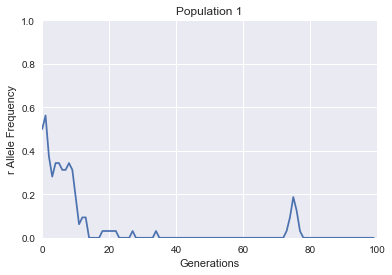

In [83]:
# 1.f.

# Define starting probability, number of generations, number of alleles, number of populations, and mu frequency
freq = 0.5
num_gen = 100
num_allele = 32
num_pop = 100
mu_freq = 0.001

# Initialize array to store frequencies
freq_array = numpy.zeros((num_pop, num_gen))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[i][0] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[i][j-1])

        choices_mu_r = numpy.random.rand(num_r)
        choices_mu_w = numpy.random.rand(num_allele - num_r)
        
        num_r = num_r - numpy.sum(choices_mu_r < 0.001)
        num_r = num_r + numpy.sum(choices_mu_w < 0.001)
        
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[i][j] = new_freq

# Initialize array to store generation number
gen_array = numpy.arange(0, num_gen, 1)
        
plt.plot(gen_array, freq_array[0])
plt.title('Population 1')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

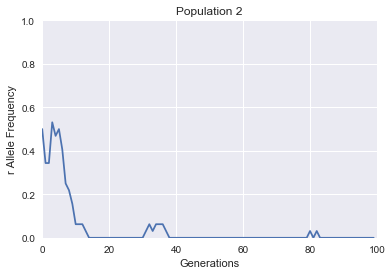

In [88]:
plt.plot(gen_array, freq_array[1])
plt.title('Population 2')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

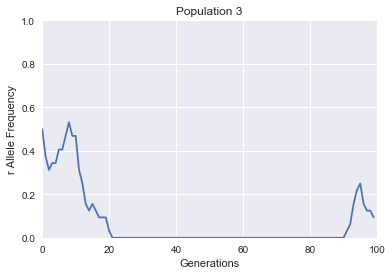

In [89]:
plt.plot(gen_array, freq_array[2])
plt.title('Population 3')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

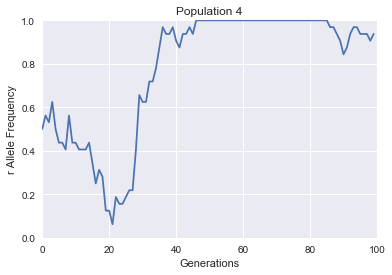

In [90]:
plt.plot(gen_array, freq_array[3])
plt.title('Population 4')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

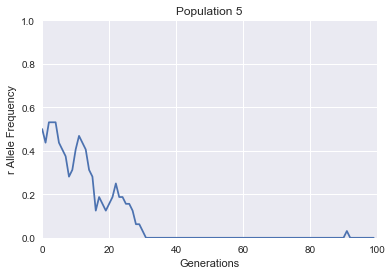

In [91]:
plt.plot(gen_array, freq_array[4])
plt.title('Population 5')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

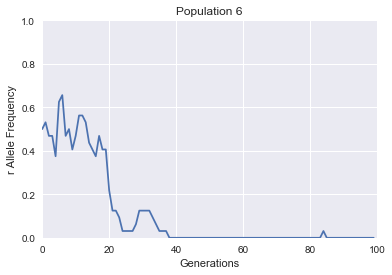

In [92]:
plt.plot(gen_array, freq_array[5])
plt.title('Population 6')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

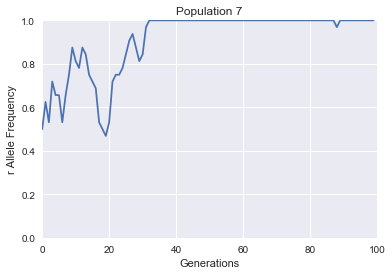

In [93]:
plt.plot(gen_array, freq_array[6])
plt.title('Population 7')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

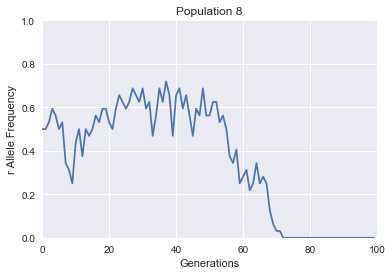

In [94]:
plt.plot(gen_array, freq_array[7])
plt.title('Population 8')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

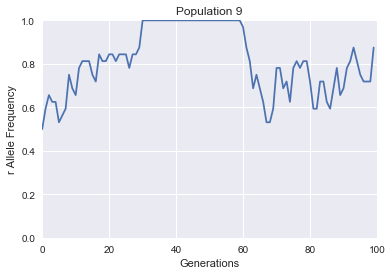

In [95]:
plt.plot(gen_array, freq_array[8])
plt.title('Population 9')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 100, 0, 1]

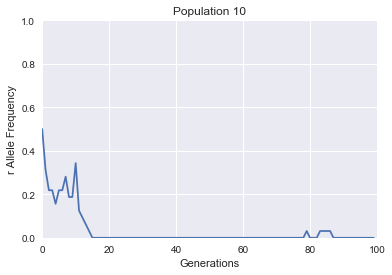

In [96]:
plt.plot(gen_array, freq_array[9])
plt.title('Population 10')
plt.xlabel('Generations')
plt.ylabel('r Allele Frequency')
plt.axis([0, 100, 0, 1])

[0, 1, 0, 100]

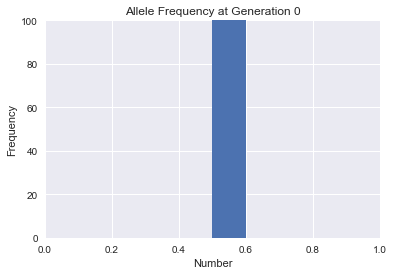

In [97]:
# Invert freq_array's axes
freq_array_2 = numpy.zeros((num_gen, num_pop))
for i in range(num_pop):
    for j in range(num_gen):
        freq_array_2[j][i] = freq_array[i][j]
        
plt.hist(freq_array_2[0])
plt.title('Allele Frequency at Generation 0')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

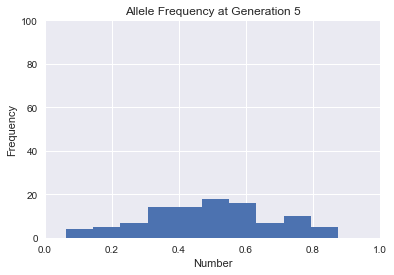

In [98]:
plt.hist(freq_array_2[5])
plt.title('Allele Frequency at Generation 5')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

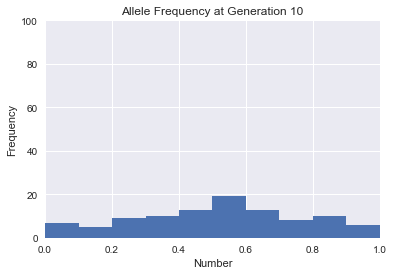

In [99]:
plt.hist(freq_array_2[10])
plt.title('Allele Frequency at Generation 10')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

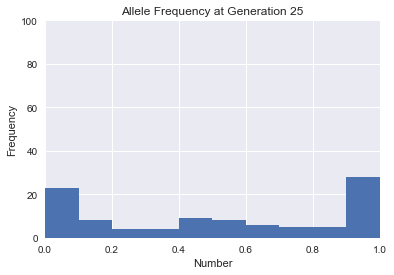

In [100]:
plt.hist(freq_array_2[25])
plt.title('Allele Frequency at Generation 25')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

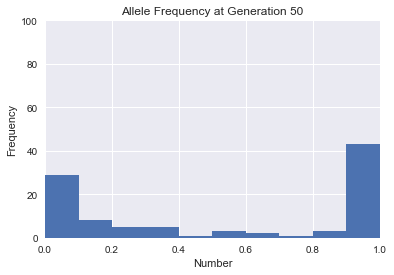

In [105]:
plt.hist(freq_array_2[50])
plt.title('Allele Frequency at Generation 50')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

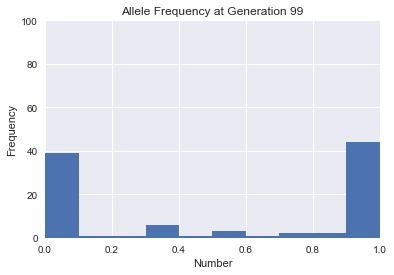

In [104]:
plt.hist(freq_array_2[99])
plt.title('Allele Frequency at Generation 99')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

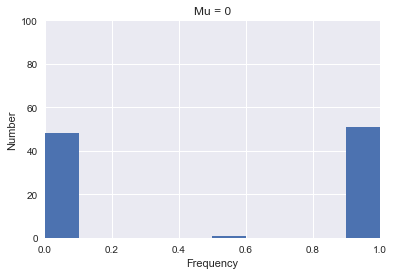

In [119]:
# 1.g.

# Define starting probability, number of generations, number of alleles, number of populations, and mu frequency
freq = 0.5
num_gen = 100
num_allele = 32
num_pop = 100
mu_freq = 0

# Initialize array to store frequencies
freq_array = numpy.zeros((num_pop, num_gen))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[i][0] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[i][j-1])

        choices_mu_r = numpy.random.rand(num_r)
        choices_mu_w = numpy.random.rand(num_allele - num_r)
        
        num_r = num_r - numpy.sum(choices_mu_r < mu_freq)
        num_r = num_r + numpy.sum(choices_mu_w < mu_freq)
        
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[i][j] = new_freq

# Initialize array to store generation number
gen_array = numpy.arange(0, num_gen, 1)

# Invert freq_array's axes
freq_array_2 = numpy.zeros((num_gen, num_pop))
for i in range(num_pop):
    for j in range(num_gen):
        freq_array_2[j][i] = freq_array[i][j]
        
plt.hist(freq_array_2[99])
plt.title('Mu = 0')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

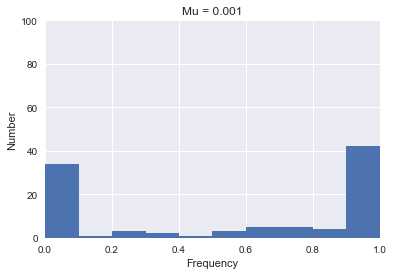

In [120]:
# Define starting probability, number of generations, number of alleles, number of populations, and mu frequency
freq = 0.5
num_gen = 100
num_allele = 32
num_pop = 100
mu_freq = 0.001

# Initialize array to store frequencies
freq_array = numpy.zeros((num_pop, num_gen))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[i][0] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[i][j-1])

        choices_mu_r = numpy.random.rand(num_r)
        choices_mu_w = numpy.random.rand(num_allele - num_r)
        
        num_r = num_r - numpy.sum(choices_mu_r < mu_freq)
        num_r = num_r + numpy.sum(choices_mu_w < mu_freq)
        
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[i][j] = new_freq

# Initialize array to store generation number
gen_array = numpy.arange(0, num_gen, 1)

# Invert freq_array's axes
freq_array_2 = numpy.zeros((num_gen, num_pop))
for i in range(num_pop):
    for j in range(num_gen):
        freq_array_2[j][i] = freq_array[i][j]
        
plt.hist(freq_array_2[99])
plt.title('Mu = 0.001')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

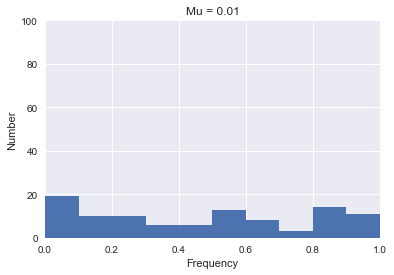

In [121]:
# Define starting probability, number of generations, number of alleles, number of populations, and mu frequency
freq = 0.5
num_gen = 100
num_allele = 32
num_pop = 100
mu_freq = 0.01

# Initialize array to store frequencies
freq_array = numpy.zeros((num_pop, num_gen))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[i][0] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[i][j-1])

        choices_mu_r = numpy.random.rand(num_r)
        choices_mu_w = numpy.random.rand(num_allele - num_r)
        
        num_r = num_r - numpy.sum(choices_mu_r < mu_freq)
        num_r = num_r + numpy.sum(choices_mu_w < mu_freq)
        
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[i][j] = new_freq

# Initialize array to store generation number
gen_array = numpy.arange(0, num_gen, 1)

# Invert freq_array's axes
freq_array_2 = numpy.zeros((num_gen, num_pop))
for i in range(num_pop):
    for j in range(num_gen):
        freq_array_2[j][i] = freq_array[i][j]
        
plt.hist(freq_array_2[99])
plt.title('Mu = 0.01')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 100])

[0, 1, 0, 100]

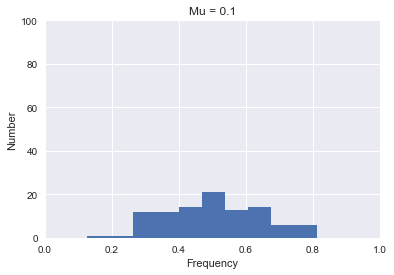

In [122]:
# Define starting probability, number of generations, number of alleles, number of populations, and mu frequency
freq = 0.5
num_gen = 100
num_allele = 32
num_pop = 100
mu_freq = 0.1

# Initialize array to store frequencies
freq_array = numpy.zeros((num_pop, num_gen))

# Loop through each generation for each population calculating the frequency of the allele
for i in range(num_pop):
    freq_array[i][0] = freq
    
    # Update freq at each generation
    for j in range(1, num_gen):
        choices = numpy.random.rand(num_allele)
        num_r = numpy.sum(choices < freq_array[i][j-1])

        choices_mu_r = numpy.random.rand(num_r)
        choices_mu_w = numpy.random.rand(num_allele - num_r)
        
        num_r = num_r - numpy.sum(choices_mu_r < mu_freq)
        num_r = num_r + numpy.sum(choices_mu_w < mu_freq)
        
        new_freq = num_r / num_allele
    
        #Store new_freq
        freq_array[i][j] = new_freq

# Initialize array to store generation number
gen_array = numpy.arange(0, num_gen, 1)

# Invert freq_array's axes
freq_array_2 = numpy.zeros((num_gen, num_pop))
for i in range(num_pop):
    for j in range(num_gen):
        freq_array_2[j][i] = freq_array[i][j]
        
plt.hist(freq_array_2[99])
plt.title('Mu = 0.1')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.axis([0, 1, 0, 100])

1.g.

    As the mutation rate increases, the distribution becomes more centralized.

2.a.
    
    Ntot(t) = N1(t) + N2(t) = N1(0)e^(m1*t) + N2(0)e^(m2*t)
    
2.b.

    p(t) = N1(t) / Ntot(t) = N1(0)e^(m1*t) / (N1(0)e^(m1*t) + N2(0)e^(m2*t))
         = 1 / (1 + (N2(0)e^(m1*t) / N1(0)e^(m2*t))
         = 1 / (1 + ((N2(0)/N1(0))*e^((m2-m1)*t)))
         
    m2 = m1(1 - s)
    m2 - m1 = -s * m1
    
    p(t) = 1 / (1 + ((N2(0)/N1(0))*e^(-s*m1*t)))
         
    q(t) = 1 - p(t) = 1 - 1 / (1 + ((N2(0)/N1(0))e^(-s*m1*t)))
         = (1 + (N2(0)/N1(0))e^(-s*m1*t) - 1) / (1 + ((N2(0)/N1(0))*e^(-s*m1*t)))
         = (N2(0)/N1(0))*e^(-s*m1*t) / (1 + ((N2(0)/N1(0))*e^(-s*m1*t)))
         
2.c.

    p(0) = 10^-9 = 1 / (1 + ((N2(0)/N1(0))*e^(-s*m1*0))) = 1 / (1 + (N2(0)/N1(0)))
    (10^-9) * (1 + (N2(0)/N1(0))) = 1
    10^9 - 1 = = 10^9 = N2(0)/N1(0)